In [46]:
import pandas as pd
import numpy as np
data = pd.read_csv('../Datasets/short_data.csv')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 39 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unnamed: 0                                          1209 non-null   int64  
 1   __v                                                 1209 non-null   int64  
 2   _id                                                 1209 non-null   object 
 3   conversationsMeta.averageConversationLength         1209 non-null   float64
 4   conversationsMeta.averageConversationLengthInDays   1209 non-null   float64
 5   conversationsMeta.longestConversation               1209 non-null   int64  
 6   conversationsMeta.longestConversationInDays         1209 non-null   float64
 7   conversationsMeta.medianConversationLength          1209 non-null   int64  
 8   conversationsMeta.medianConversationLengthInDays    1209 non-null   float64
 9

## Исследование полей

Кого больше среди пользователей: мужчин или женщин?

In [48]:
print(data['user.gender'].isna().sum())
print(data['user.gender'].unique())

1
['M' 'F' nan]


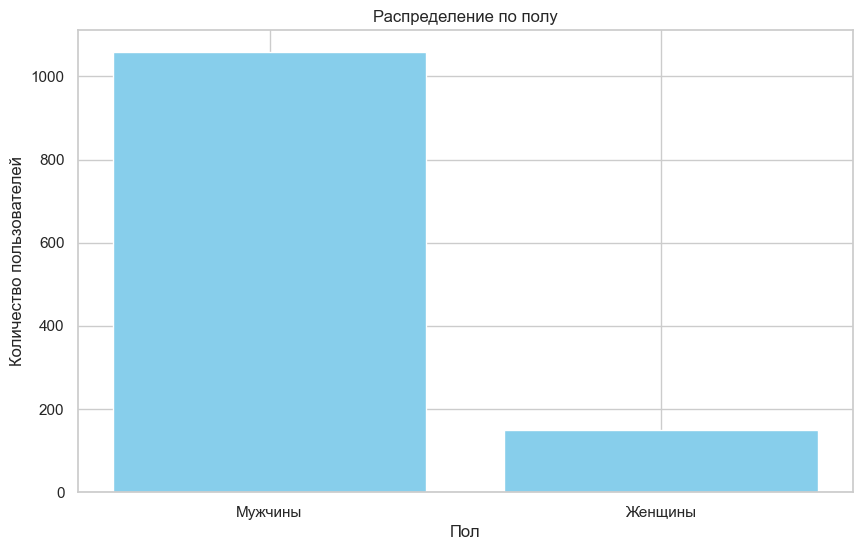

In [49]:
import matplotlib.pyplot as plt

# Строим гистограмму для поля 'user.gender'
gender_counts = data['user.gender'].value_counts()
labels = ['Мужчины' if x == 'M' else 'Женщины' for x in gender_counts.index]

# Визуализация
plt.figure(figsize=(10, 6))
plt.bar(labels, gender_counts, color='skyblue')
plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


У кого больше совпадений?

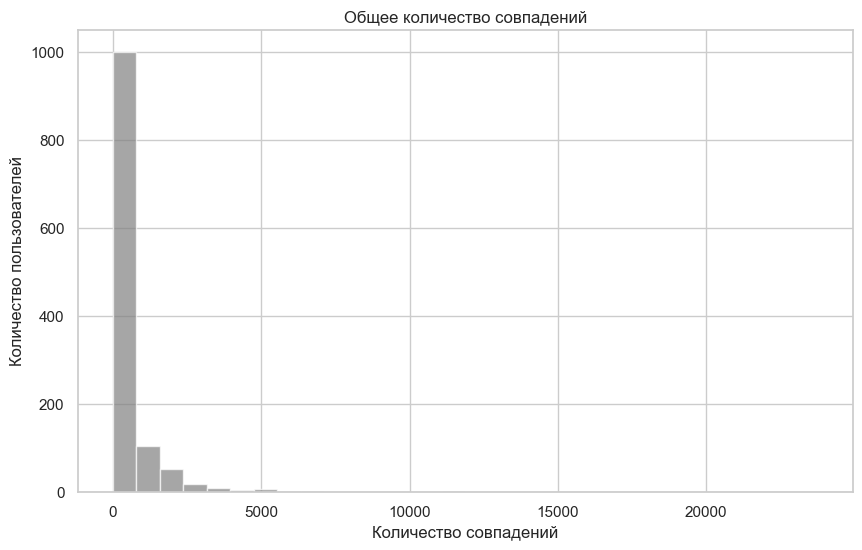

In [65]:
total_matches = data['Total_matches']

# Визуализация гистограммы для всех пользователей
plt.figure(figsize=(10, 6))
plt.hist(total_matches, bins=30, color='gray', alpha=0.7)
plt.title('Общее количество совпадений')
plt.xlabel('Количество совпадений')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()


Видно, что больше 5000 рассматривать не имеет смысла

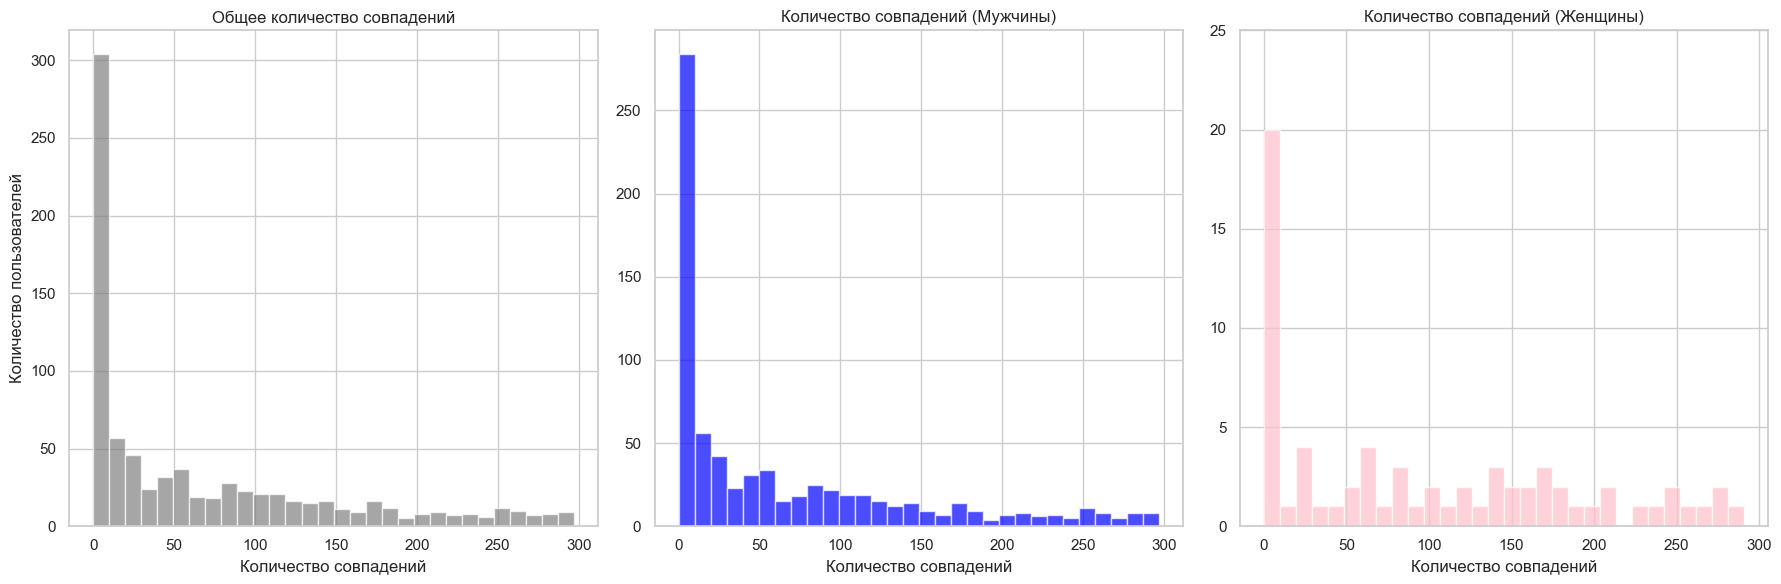

In [67]:
# Фильтрация данных по полу
male_data = data[data['user.gender'] == 'M']['Total_matches']
female_data = data[data['user.gender'] == 'F']['Total_matches']

male_data = male_data[male_data <= 300]
female_data = female_data[female_data <= 300]

# Общие данные
total_matches_data = data['Total_matches']
total_matches_data = total_matches_data[total_matches_data <= 300]

# Создание фигуры и осей для 3 гистограмм
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Гистограмма для всех пользователей
axes[0].hist(total_matches_data, bins=30, color='gray', alpha=0.7)
axes[0].set_title('Общее количество совпадений')
axes[0].set_xlabel('Количество совпадений')
axes[0].set_ylabel('Количество пользователей')

# Гистограмма для мужчин
axes[1].hist(male_data, bins=30, color='blue', alpha=0.7)
axes[1].set_title('Количество совпадений (Мужчины)')
axes[1].set_xlabel('Количество совпадений')

# Гистограмма для женщин
axes[2].hist(female_data, bins=30, color='pink', alpha=0.7)
axes[2].set_title('Количество совпадений (Женщины)')
axes[2].set_xlabel('Количество совпадений')
axes[2].set_ylim(0, 25)

# Отображение гистограмм
plt.tight_layout()
plt.show()


Кто чаще пишет сообщения?

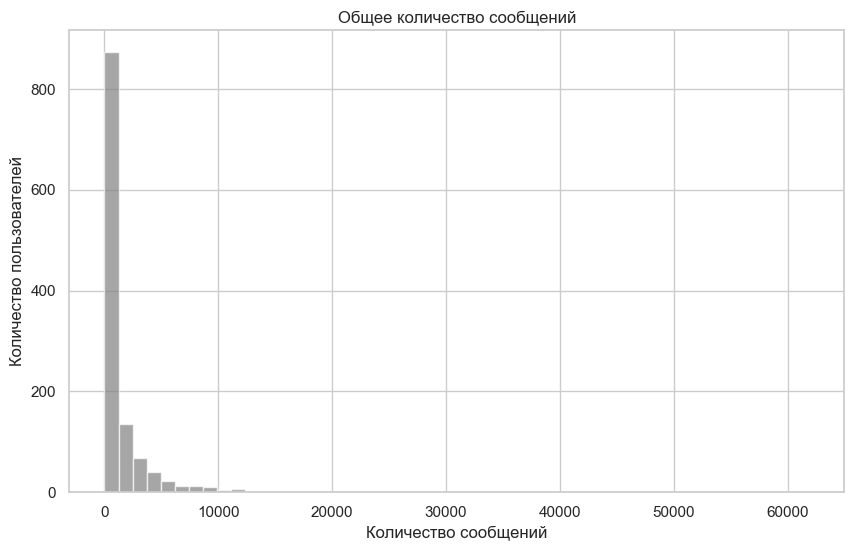

In [68]:
total_matches = data['Total_messagesSent']

# Визуализация гистограммы для всех пользователей
plt.figure(figsize=(10, 6))
plt.hist(total_matches, bins=50, color='gray', alpha=0.7)
plt.title('Общее количество сообщений')
plt.xlabel('Количество сообщений')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()


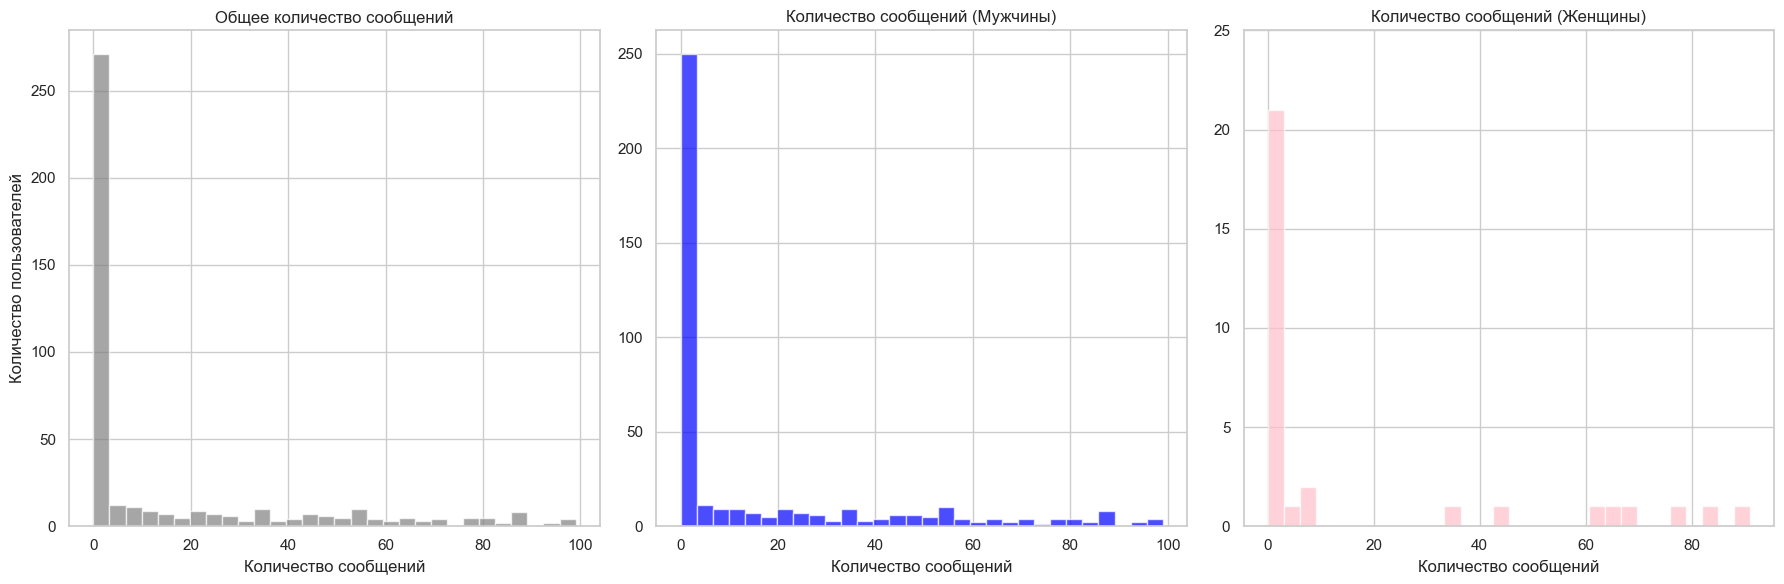

In [69]:
# Фильтрация данных по полу
male_data = data[data['user.gender'] == 'M']['Total_messagesSent']
female_data = data[data['user.gender'] == 'F']['Total_messagesSent']

male_data = male_data[male_data <= 100]
female_data = female_data[female_data <= 100]

# Общие данные
total_matches_data = data['Total_messagesSent']
total_matches_data = total_matches_data[total_matches_data <= 100]

# Создание фигуры и осей для 3 гистограмм
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Гистограмма для всех пользователей
axes[0].hist(total_matches_data, bins=30, color='gray', alpha=0.7)
axes[0].set_title('Общее количество сообщений')
axes[0].set_xlabel('Количество сообщений')
axes[0].set_ylabel('Количество пользователей')

# Гистограмма для мужчин
axes[1].hist(male_data, bins=30, color='blue', alpha=0.7)
axes[1].set_title('Количество сообщений (Мужчины)')
axes[1].set_xlabel('Количество сообщений')

# Гистограмма для женщин
axes[2].hist(female_data, bins=30, color='pink', alpha=0.7)
axes[2].set_title('Количество сообщений (Женщины)')
axes[2].set_xlabel('Количество сообщений')
axes[2].set_ylim(0, 25)

# Отображение гистограмм
plt.tight_layout()
plt.show()


Кто чаще заходит в приложение?

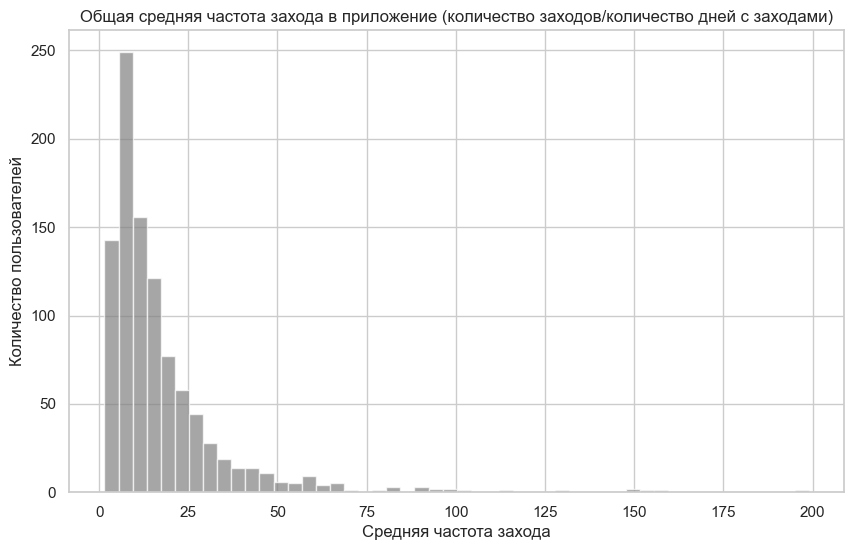

In [70]:
total_matches = data['Total_appOpens'] / data['DaysWith_appOpens']

# Визуализация гистограммы для всех пользователей
plt.figure(figsize=(10, 6))
plt.hist(total_matches, bins=50, color='gray', alpha=0.7)
plt.title('Общая средняя частота захода в приложение (количество заходов/количество дней с заходами)')
plt.xlabel('Средняя частота захода')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

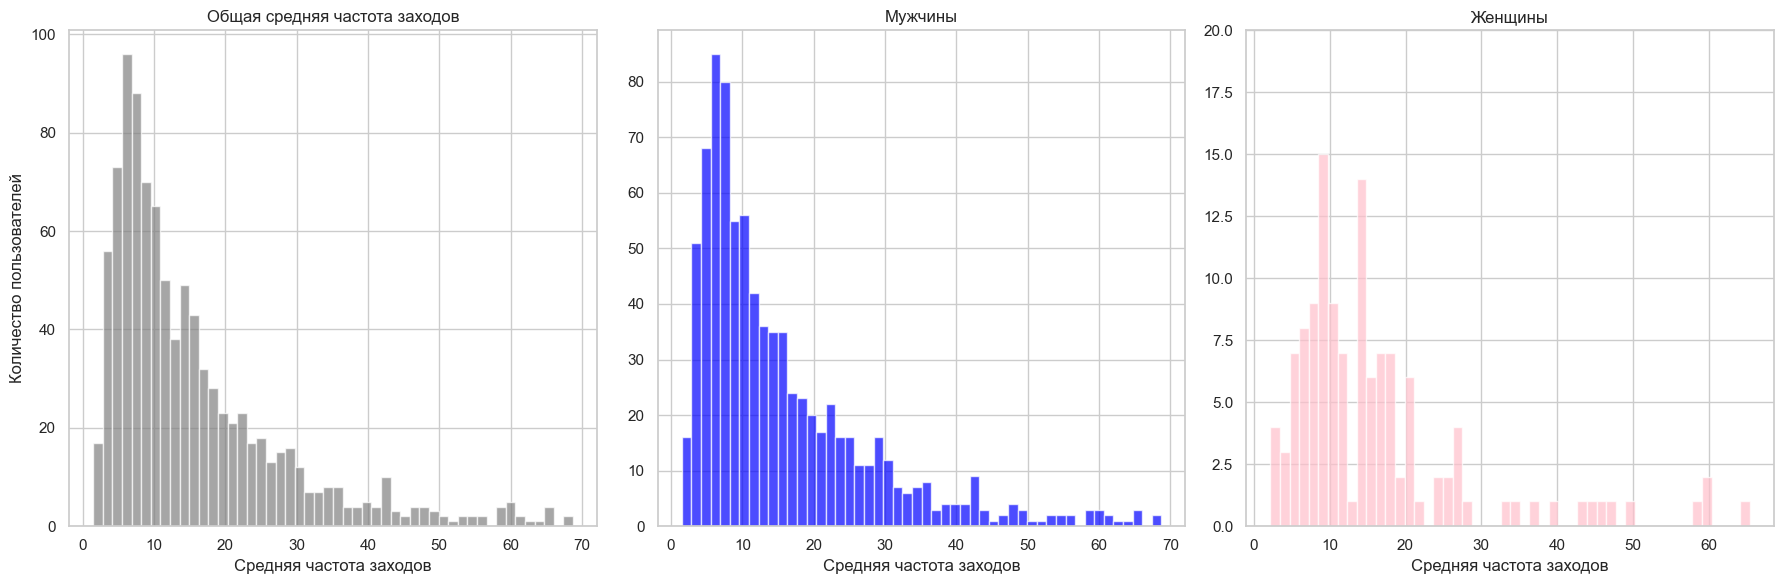

In [73]:
# Фильтрация данных по полу
male_data = data[data['user.gender'] == 'M']['Total_appOpens'] / data[data['user.gender'] == 'M']['DaysWith_appOpens']
female_data = data[data['user.gender'] == 'F']['Total_appOpens'] / data[data['user.gender'] == 'F']['DaysWith_appOpens']

male_data = male_data[male_data <= 75]
female_data = female_data[female_data <= 75]

# Общие данные
total_matches_data = data['Total_appOpens'] / data['DaysWith_appOpens']
total_matches_data = total_matches_data[total_matches_data <= 75]

# Создание фигуры и осей для 3 гистограмм
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Гистограмма для всех пользователей
axes[0].hist(total_matches_data, bins=50, color='gray', alpha=0.7)
axes[0].set_title('Общая средняя частота заходов')
axes[0].set_xlabel('Средняя частота заходов')
axes[0].set_ylabel('Количество пользователей')

# Гистограмма для мужчин
axes[1].hist(male_data, bins=50, color='blue', alpha=0.7)
axes[1].set_title('Мужчины')
axes[1].set_xlabel('Средняя частота заходов')

# Гистограмма для женщин
axes[2].hist(female_data, bins=50, color='pink', alpha=0.7)
axes[2].set_title('Женщины')
axes[2].set_xlabel('Средняя частота заходов')
axes[2].set_ylim(0, 20)

# Отображение гистограмм
plt.tight_layout()
plt.show()


## Есть ли нормально распределённые данные?

In [80]:
import scipy.stats as stats

# Список столбцов для проверки на нормальность
columns = ['conversationsMeta.averageConversationLength',
           'conversationsMeta.averageConversationLengthInDays',
           'conversationsMeta.longestConversation',
           'conversationsMeta.longestConversationInDays',
           'conversationsMeta.medianConversationLength',
           'conversationsMeta.medianConversationLengthInDays',
           'conversationsMeta.nrOfConversations',
           'conversationsMeta.nrOfGhostingsAfterInitialMessage',
           'conversationsMeta.nrOfOneMessageConversations',
           'conversationsMeta.percentOfOneMessageConversations',
           'Total_appOpens', 'DaysWith_appOpens', 'Total_matches',
           'DaysWith_matches', 'Total_messagesReceived',
           'DaysWith_messagesReceived', 'Total_messagesSent',
           'DaysWith_messagesSent', 'Total_swipeLikes', 'DaysWith_swipeLikes',
           'Total_swipePasses', 'DaysWith_swipePasses']

# Функция для выполнения тестов на нормальность
def normality_tests(series):
    results = {}
    shapiro_test = stats.shapiro(series)
    d_agostino_test = stats.normaltest(series)
    anderson_test = stats.anderson(series, dist='norm')
    
    # Сбор результатов
    results['shapiro'] = shapiro_test[1] > 0.05  # Истина, если распределение нормальное
    results['d_agostino'] = d_agostino_test[1] > 0.05  # Истина, если распределение нормальное
    results['anderson'] = all([cv > anderson_test.statistic for cv in anderson_test.critical_values])
    
    # Если все тесты согласны с нормальностью
    if results['shapiro'] and results['d_agostino'] and results['anderson']:
        return True
    else:
        return False

# Словарь для хранения результатов
normal_columns = []

# Применение тестов
for col in columns:
    if normality_tests(data[col]):
        normal_columns.append(col)

normal_columns


[]

##### Вывод: среди данных нет распределённых нормально

## Проверка гипотез

### Соц сети и сообещения

Проверим гипотезу (как нулевую) "наличие подключённых социальных сетей не влияет на количество получаемых сообщений" с альтернативной гипотезой "при подключении соц сетей количество получаемых сообщений увеличивается".

In [120]:
has_instagram = data['Total_messagesReceived'][data['user.instagram'] == True]
no_instagram = data['Total_messagesReceived'][data['user.instagram'] == False]

# Поскольку данные распределены не нормально, используем непараметрический тест (Mann-Whitney U test)
# для сравнения двух независимых выборок
u_statistic, p_value = stats.mannwhitneyu(has_instagram, no_instagram, alternative='greater')

# Вывод результатов
print("U-статистика:", u_statistic)
print("P-значение:", p_value)

U-статистика: 154572.5
P-значение: 4.3860767732388725e-09


p-value значительно меньше 0.05, что указывает на статистически значимые различия между двумя группами. Это позволяет отвергнуть нулевую гипотезу о том, что количества полученных сообщений для пользователей с подключенным аккаунтом Instagram и без него равны.

##### **Вывод**: Наличие подключенного аккаунта Instagram увеличивает количество полученных сообщений.

In [122]:
has_spotify = data['Total_messagesReceived'][data['user.spotify'] == True]
no_spotify = data['Total_messagesReceived'][data['user.spotify'] == False]

# Поскольку данные распределены не нормально, используем непараметрический тест (Mann-Whitney U test)
# для сравнения двух независимых выборок
u_statistic, p_value = stats.mannwhitneyu(has_spotify, no_spotify, alternative='greater')

# Вывод результатов
print("U-статистика:", u_statistic)
print("P-значение:", p_value)

U-статистика: 183546.5
P-значение: 0.02057653559935015


P-значение меньше 0.05, что указывает на статистическую значимость различий между двумя группами. Это позволяет отвергнуть нулевую гипотезу о том, что количества полученных сообщений для пользователей с подключенным Spotify и без него равны.

##### **Вывод**: Наличие подключенного аккаунта Spotify статистически значимо увеличивает количество полученных сообщений.

Стоит отметить, что на уровне значимости 0.01 нулевую гипотезу стоило бы принять, в отличии от предыдущего случая.

### Соц сети и мэтчи

Проверим гипотезу (как нулевую) "наличие подключённых социальных сетей не влияет на количество совпадений" с альтернативной гипотезой "при подключении соц сетей количество совпадений увеличивается".

In [125]:
has_instagram = data['Total_matches'][data['user.instagram'] == True]
no_instagram = data['Total_matches'][data['user.instagram'] == False]

# Поскольку данные распределены не нормально, используем непараметрический тест (Mann-Whitney U test)
# для сравнения двух независимых выборок
u_statistic, p_value = stats.mannwhitneyu(has_instagram, no_instagram, alternative='greater')

# Вывод результатов
print("U-статистика:", u_statistic)
print("P-значение:", p_value)

U-статистика: 154790.0
P-значение: 3.567092370516528e-09


In [126]:
has_spotify = data['Total_matches'][data['user.spotify'] == True]
no_spotify = data['Total_matches'][data['user.spotify'] == False]

# Поскольку данные распределены не нормально, используем непараметрический тест (Mann-Whitney U test)
# для сравнения двух независимых выборок
u_statistic, p_value = stats.mannwhitneyu(has_spotify, no_spotify, alternative='greater')

# Вывод результатов
print("U-статистика:", u_statistic)
print("P-значение:", p_value)

U-статистика: 187985.0
P-значение: 0.0025810873880907103


Результаты аналогичны предыдущим.
##### **Вывод**: Наличие подключенных аккаунтов Instagram (Spotify) статистически значимо увеличивает количество совпадений.